In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import imageio as iio
from ratmoseq_extract.io import read_frames, write_frames

In [2]:
pdir = Path('/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/notebooks/misc/dlc_training_data')
vid = pdir / '4weeks_grin2b_cohort14_session_20240508120248.avi'

In [3]:
vid = read_frames(vid.as_posix(), range(100))

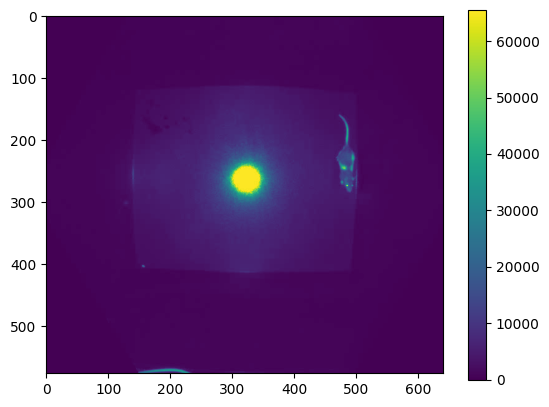

In [4]:
plt.imshow(vid[0])
plt.colorbar()

In [5]:
import cv2
# write_frames('tst.avi', normed_vid.astype('uint8'), pixel_format='gray')
def write_frames(video_array, output_file, fps=30):
    # Get the dimensions of the video array
    time, height, width = video_array.shape
    
    # Define the codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Codec for .avi files
    video_writer = cv2.VideoWriter(str(output_file), fourcc, fps, (width, height), isColor=False)
    
    # Write each frame to the video file
    for frame in video_array:
        video_writer.write(frame)
    
    # Release the VideoWriter object
    video_writer.release()

In [7]:
raw_ir = '/n/groups/datta/jlove/data/rat_seq/rat_seq_paper/data/14weeks/arid1b/cohort15/session_20240801100434/ir.avi'
frames = read_frames(raw_ir, range(100))
clipped = np.clip(frames, 0, 1000).astype(np.uint16)
clipped = clipped / clipped.max() * 255
clipped = clipped.astype(np.uint8)
# new_path = path.parent / (path.stem + '_clipped' + path.suffix)
write_frames(clipped, 'tst.avi')